In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from math import inf
from collections import deque

#    Draw an unweighted connected graph.
#    Args:
#        graph: dict[vertex, list[vertex]] e.g. G = {"S": ["A", "B"], "A": ["D"], "B": ["F"], "D": ["A", "B"], "F": [] }
#        start: starting vertex printed at the top of the page e.g. start = "S"
#        title: defalut "My Graph" but can changed to any string
#    Returns:
#        none: only output is a print of a graph

# help function
def bfs_distances(graph, start):
    """helper to get distances from start (same as in bfs but shorter)"""
    dist = {u: inf for u in graph}
    if start not in graph:
        return dist
    dist[start] = 0
    Q = deque([start])
    while Q:
        u = Q.popleft()
        for v in graph[u]:
            if dist[v] == inf:
                dist[v] = dist[u] + 1
                Q.append(v)
    return dist


#function to draw the graph
def draw_graph(graph, start, title="My Graph"):
    """
    Draw the full graph but with vertices arranged in BFS layers from 'start'.
    """
    # compute BFS distances
    dist = bfs_distances(graph, start)

    # build a NetworkX graph
    G = nx.DiGraph()
    for u, nbrs in graph.items():
        for v in nbrs:
            G.add_edge(u, v)

    # group nodes by BFS distance
    layers = {}
    for vertex, d in dist.items():
        layers.setdefault(d, []).append(vertex)

    # assign coordinates: same y per layer, x spaced evenly
    pos = {}
    for layer, vertices in sorted(layers.items()):
        for i, vertex in enumerate(vertices):
            pos[vertex] = (i - len(vertices)/2, -layer)  # center roughly

    # draw
    plt.figure(figsize=(8, 5))
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=2000,
        node_color="lightblue",
        edgecolors="black",
        arrows=True,
        arrowsize=20,
        font_size=10
    )
    plt.title(f"{title} (start: {start})", fontsize=13)
    plt.show()


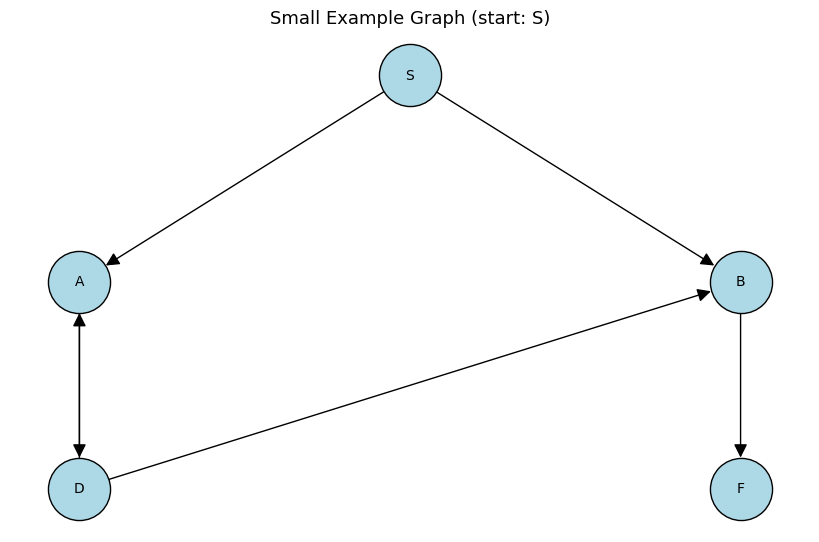

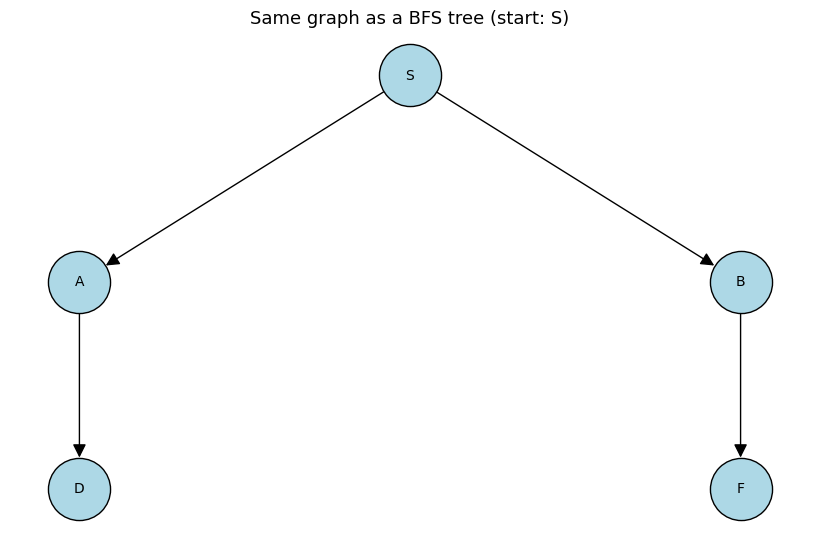

In [3]:
G = {"S": ["A", "B"], "A": ["D"], "B": ["F"], "D": ["A", "B"], "F": [] }
draw_graph(G, start="S", title="Small Example Graph")

BFS = {"S": ["A", "B"], "A": ["D"], "B": ["F"], "D": [], "F": []} 
draw_graph(BFS, start="S", title="Same graph as a BFS tree")